In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%run src/foveation_utils.py

In [4]:
keehar_plaintext_rgb  = cv2.imread("input/text/images/keehar-plaintext.png", cv2.IMREAD_COLOR)
keehar_plaintext_grayscale = cv2.cvtColor(keehar_plaintext_rgb, cv2.COLOR_BGR2GRAY)
keehar_plaintext_lab = cv2.cvtColor(keehar_plaintext_rgb, cv2.COLOR_BGR2LAB)
keehar_plaintext_rgb_channels = cv2.split(keehar_plaintext_rgb)
keehar_plaintext_lab_channels = cv2.split(keehar_plaintext_lab)

rgb_colours = ('b', 'g', 'r')

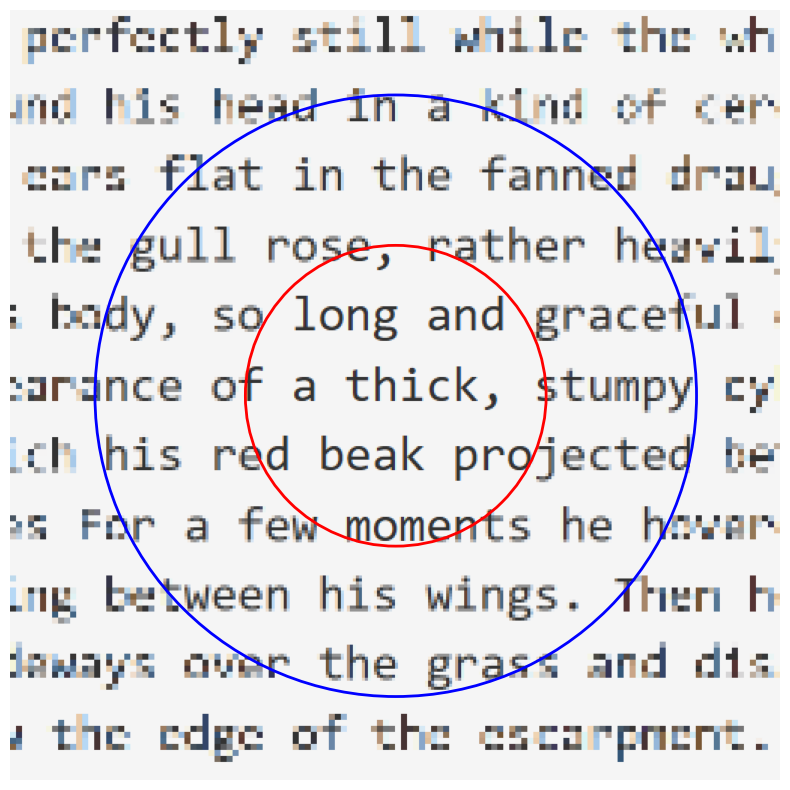

In [5]:
center = (keehar_plaintext_rgb.shape[0] // 2, keehar_plaintext_rgb.shape[1] // 2)
radii = (100, 200)
foveated_keehar_plaintext_rgb = guenter_foveated_rendering_px(keehar_plaintext_rgb, center, radii)
visualize_guenter_foveated_regions_px(foveated_keehar_plaintext_rgb, center, radii)

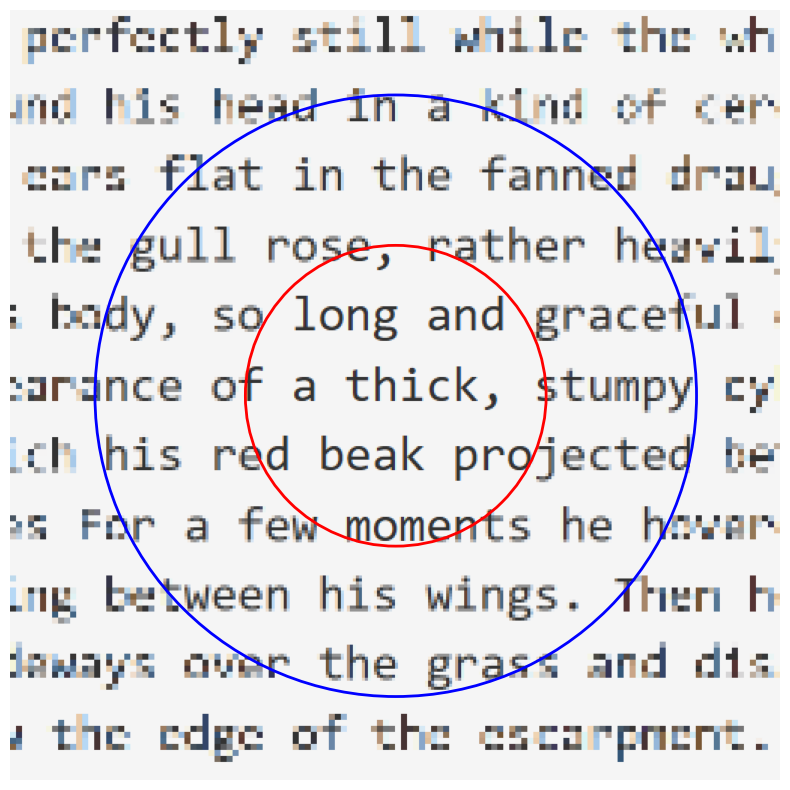

In [6]:
foveated_keehar_plaintext_rgb = guenter_foveated_rendering_px_mip(keehar_plaintext_rgb, center, radii)

visualize_guenter_foveated_regions_px(foveated_keehar_plaintext_rgb, center, radii)

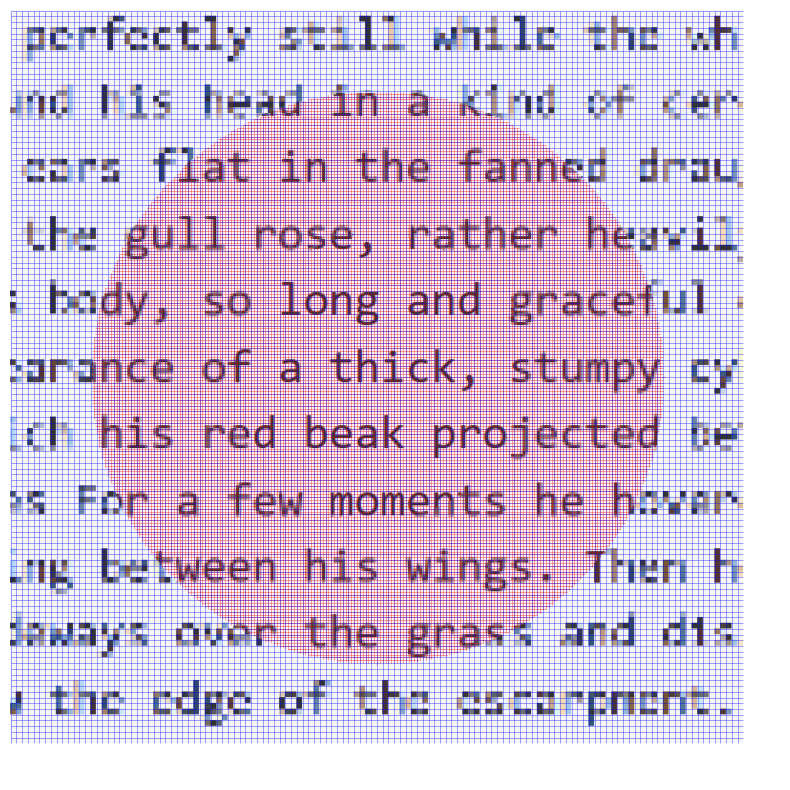

In [7]:
visualize_foveated_grid_px(foveated_keehar_plaintext_rgb, center, radii, (2, 4))

In [8]:
%run src/foveation_utils.py
(mean_texture, variance_texture, skew_texture) = compute_base_moments(keehar_plaintext_rgb, center, 0.1, base_pooling_size = 8)

In [11]:
%run src/foveation_utils.py
num_levels = 5
gaussian_pyramids = compute_gaussian_pyramids(mean_texture, variance_texture, skew_texture, num_levels)
laplacian_pyramids = compute_laplacian_pyramids(gaussian_pyramids)

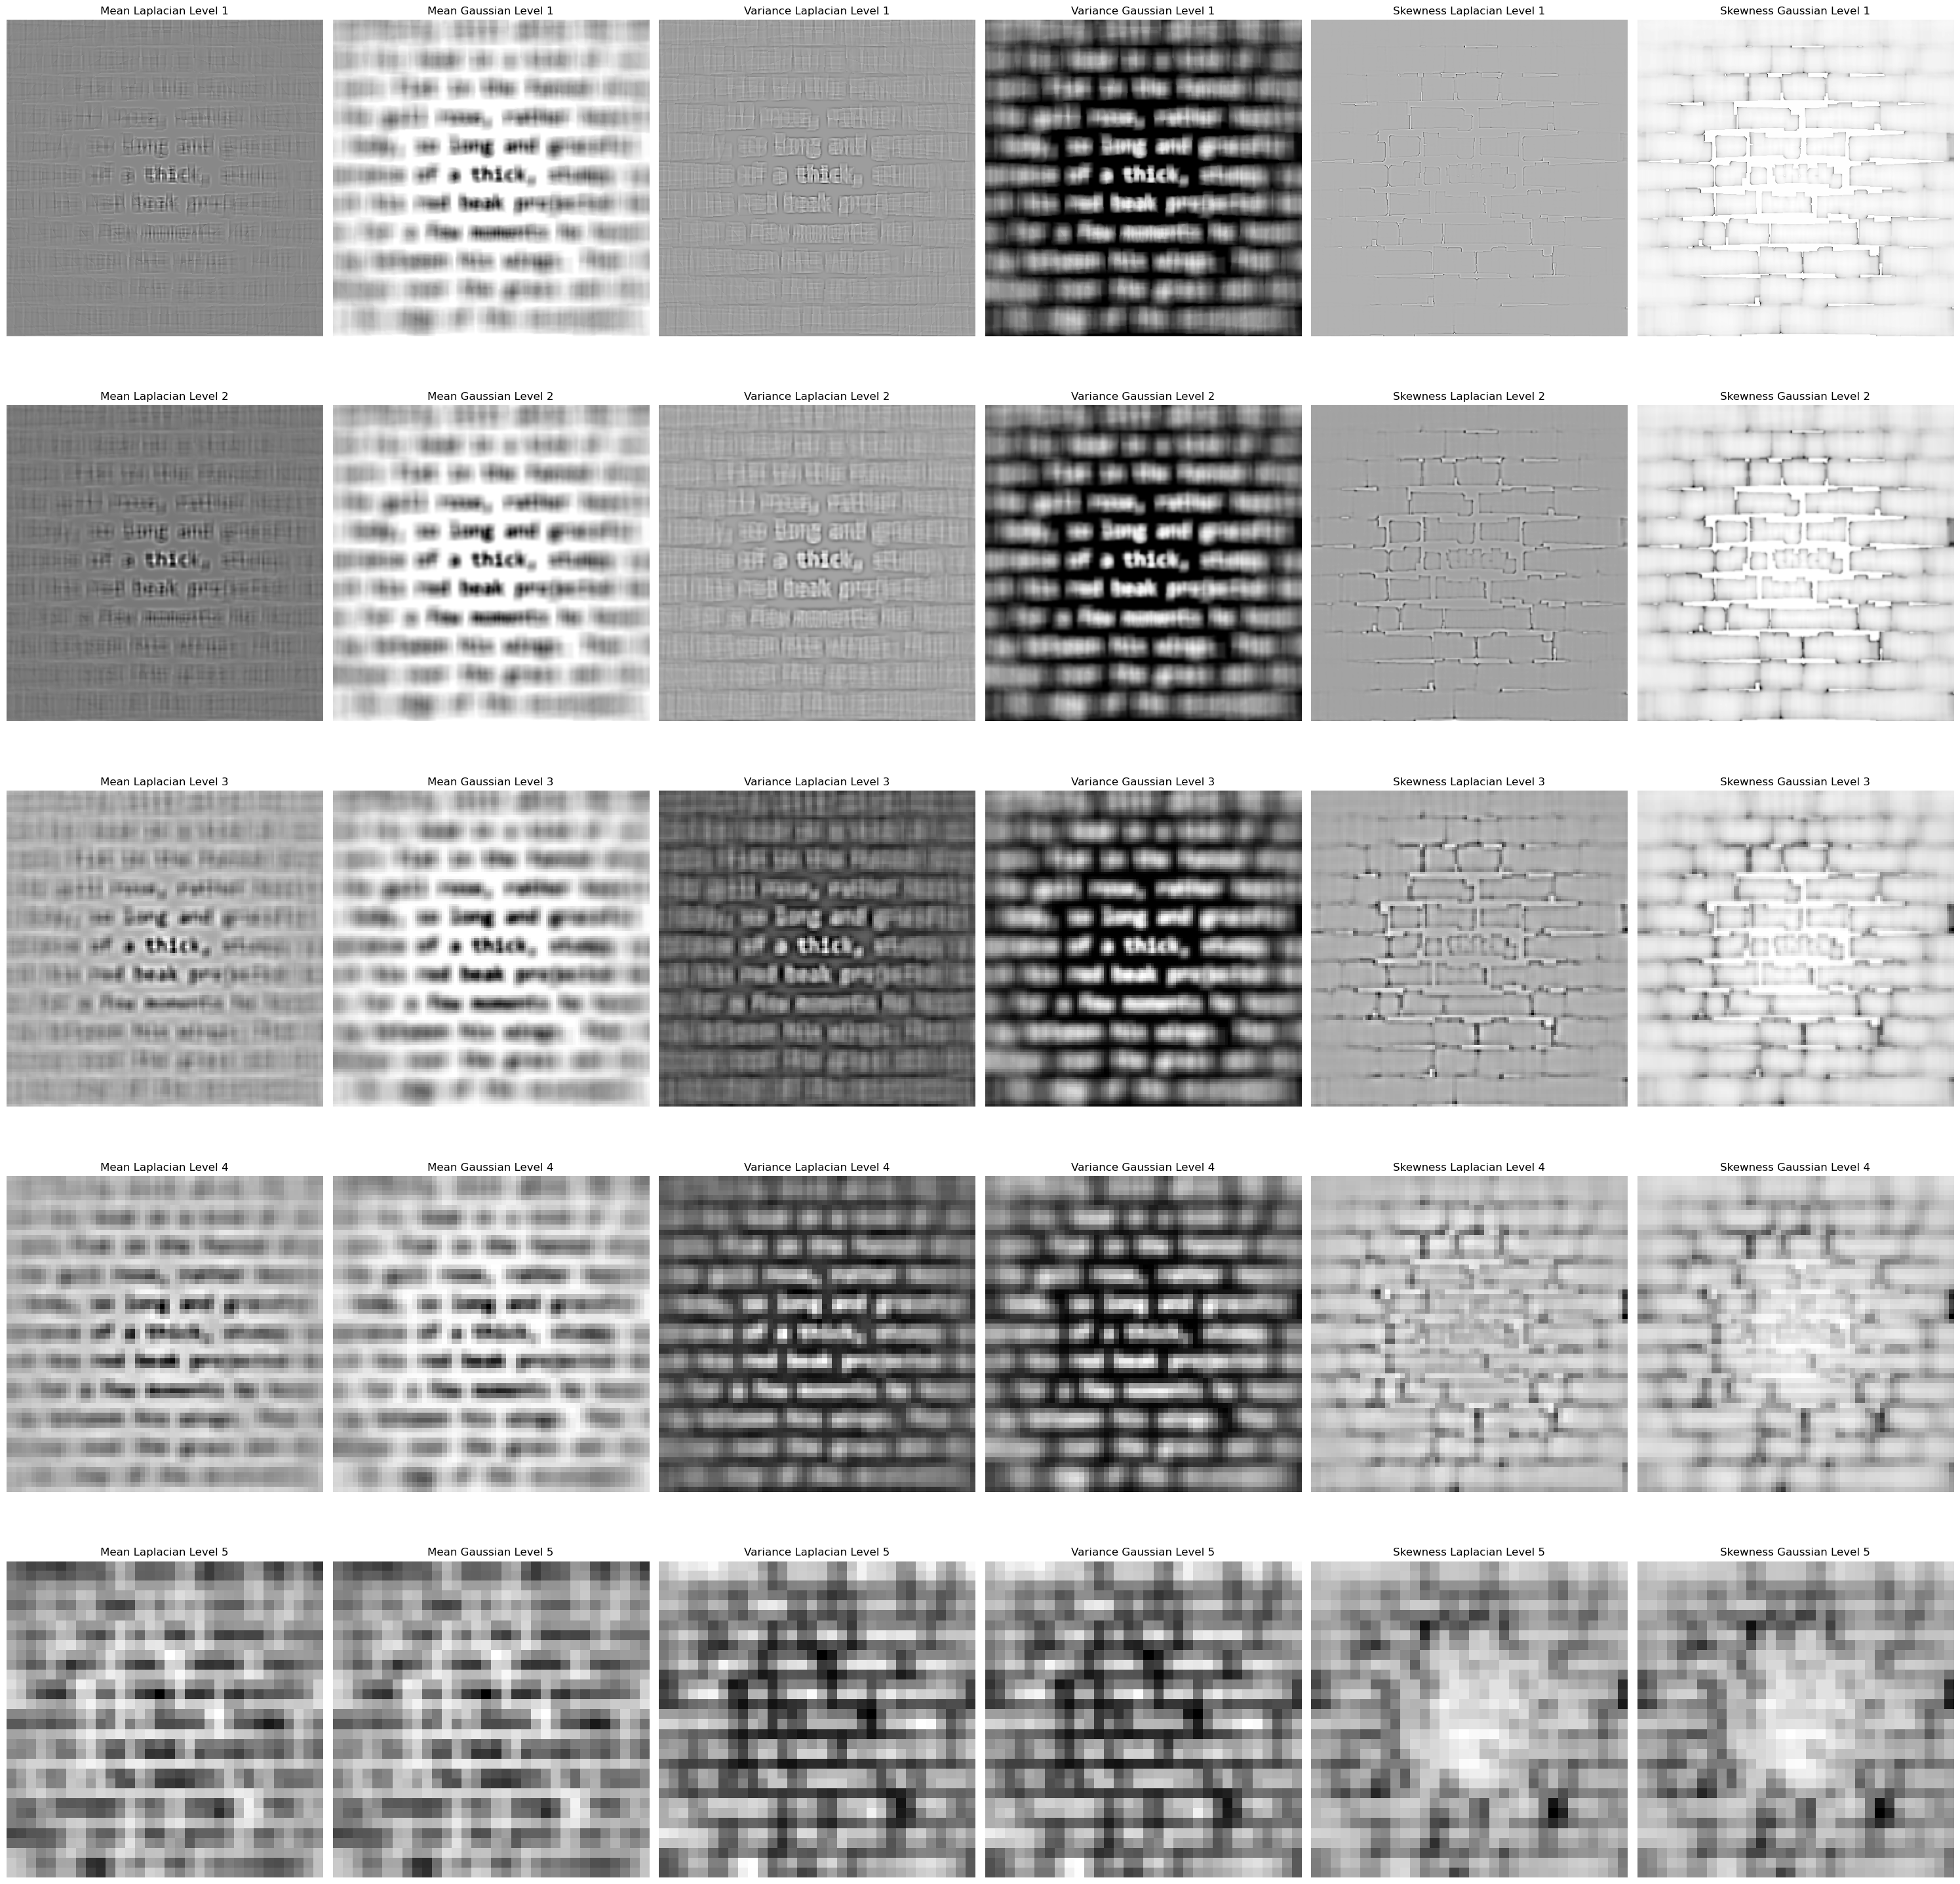

In [ ]:
'''
EXTREMELY IMPORTANT FOR INTERPRETATION:

The Laplacian's at level 0 may be very hard to see. 
This is because Laplacians represent the DIFFERENCE in levels, so
the difference between two higher resolution levels is harder to distinguish than 
betweenst lower resolution ones.
'''



fig, axes = plt.subplots(num_levels, 6, figsize=(30, 30))
for i in range(num_levels):
    axes[i, 0].imshow(cv2.normalize(laplacian_pyramids['mean'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 0].set_title(f'Mean Laplacian Level {i+1}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(cv2.normalize(gaussian_pyramids['mean'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 1].set_title(f'Mean Gaussian Level {i+1}')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(cv2.normalize(laplacian_pyramids['variance'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 2].set_title(f'Variance Laplacian Level {i+1}')
    axes[i, 2].axis('off')

    axes[i, 3].imshow(cv2.normalize(gaussian_pyramids['variance'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 3].set_title(f'Variance Gaussian Level {i+1}')
    axes[i, 3].axis('off')

    axes[i, 4].imshow(cv2.normalize(laplacian_pyramids['skew'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 4].set_title(f'Skewness Laplacian Level {i+1}')
    axes[i, 4].axis('off')

    axes[i, 5].imshow(cv2.normalize(gaussian_pyramids['skew'][i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i, 5].set_title(f'Skewness Gaussian Level {i+1}')
    axes[i, 5].axis('off')

plt.tight_layout()
plt.show()